In [1]:
import pandas as pd
import numpy as np


In [2]:
dataset = pd.read_csv("data\motionStrike_TVcodes_data.tsv", delimiter = '\t')
dataset

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\aarya\AppData\Local\Temp\ipykernel_30832\2089450476.py:1: SyntaxWarning: invalid escape sequence '\m'
  dataset = pd.read_csv("data\motionStrike_TVcodes_data.tsv", delimiter = '\t')


,CaseReferenceNumber,MotionID,CaseLocation,CaseMajorCode,CaseMinorCode,CaseTrialListType,CaseMarkingCode,CaseDispositionJudgeJurisNo,CaseDispositionDocketLegendCode,MotionResultCode,...,MotionJurisNumber,MotionDocumentPriorityCode,CaseAttorneyJuris,CaseAttorneyType,MotionTimeDuration,MotionDocumentTypeName,SelfRepBeforeMotionFileCount,SelfRepBeforeMotionDecidedCount,SelfRepBeforeMotionFileBool,SelfRepBeforeMotionDecidedBool
0,207,1751,FBT,V,1,9,16.0,416586.0,JDGDACT,GR,...,418027.0,30,418027.0,J,78.0,MOTION TO STRIKE,1,1,True,True
1,1472,10915,FBT,V,1,9,16.0,NaN,WDACT,DN,...,416586.0,30,416586.0,R,22.0,MOTION TO STRIKE,0,0,False,False
2,1494,11050,NNI,V,1,9,16.0,NaN,WDACT,GR,...,422392.0,30,422392.0,J,285.0,MOTION TO STRIKE,0,0,False,False
3,371,2708,LLI,T,90,-1,NaN,418028.0,SJD,OR,...,418028.0,30,418028.0,R,120.0,MOTION TO STRIKE,0,0,False,False
4,1422,10373,HHD,T,2,-1,NaN,422394.0,SJ,GR,...,81181.0,30,81181.0,R,153.0,MOTION TO STRIKE,0,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13798,4137836,26395795,HHD,T,20,-1,NaN,NaN,NaN,OR,...,415596.0,30,415596.0,R,47.0,MOTION TO STRIKE,0,0,False,False
13799,4143717,26397468,HHB,T,61,-1,NaN,NaN,NaN,DN,...,431662.0,30,431662.0,J,49.0,MOTION TO STRIKE,0,0,False,False
13800,4111125,26482434,TTD,T,29,-1,NaN,NaN,NaN,GR,...,436946.0,30,436946.0,J,47.0,MOTION TO STRIKE,1,2,True,True
13801,4026253,26397700,FBT,T,90,-1,NaN,NaN,NaN,GR,...,438581.0,30,438581.0,J,47.0,MOTION TO STRIKE,0,0,False,False


In [4]:
#important columns identifiers 
target= dataset["MotionResultCode"]
#potential features
features = dataset[["CaseMajorCode", "MotionTimeDuration", "CaseLocation", "CaseAttorneyJuris"]]
features

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,V,78.0,FBT,418027.0
1,V,22.0,FBT,416586.0
2,V,285.0,NNI,422392.0
3,T,120.0,LLI,418028.0
4,T,153.0,HHD,81181.0
...,...,...,...,...
13798,T,47.0,HHD,415596.0
13799,T,49.0,HHB,431662.0
13800,T,47.0,TTD,436946.0
13801,T,47.0,FBT,438581.0


In [5]:
target

0        GR
1        DN
2        GR
3        OR
4        GR
         ..
13798    OR
13799    DN
13800    GR
13801    GR
13802    WD
Name: MotionResultCode, Length: 13803, dtype: object

In [6]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [8]:

toEncode = ['CaseMajorCode', 'CaseLocation', 'CaseAttorneyJuris']
for i in toEncode:
    le = LabelEncoder()
    features[i] = le.fit_transform(features[i])

features

C:\Users\aarya\AppData\Local\Temp\ipykernel_30832\2906387462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = le.fit_transform(features[i])
C:\Users\aarya\AppData\Local\Temp\ipykernel_30832\2906387462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[i] = le.fit_transform(features[i])
C:\Users\aarya\AppData\Local\Temp\ipykernel_30832\2906387462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,1,78.0,2,195
1,1,22.0,2,186
2,1,285.0,11,236
3,0,120.0,8,196
4,0,153.0,5,72
...,...,...,...,...
13798,0,47.0,5,180
13799,0,49.0,4,283
13800,0,47.0,12,305
13801,0,47.0,2,315


In [ ]:
#experimental autoencoder
"""
The plan is to utilize an autoencoder for anomaly detection,

We will encode and decode our features and the data that exceeds the reconstruction error
bounds will be flagged as anomalies 

"""



In [14]:
#filter out nans

features = features.dropna()
features

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,1,78.0,2,195
1,1,22.0,2,186
2,1,285.0,11,236
3,0,120.0,8,196
4,0,153.0,5,72
...,...,...,...,...
13798,0,47.0,5,180
13799,0,49.0,4,283
13800,0,47.0,12,305
13801,0,47.0,2,315


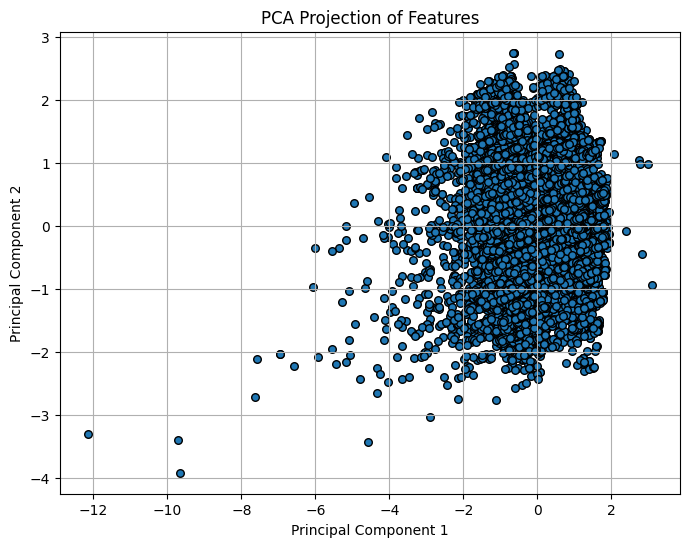

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


scaler = StandardScaler()
feature_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
feature_pca = pca.fit_transform(feature_scaled)

x = feature_pca[:, 0]
y = feature_pca[:, 1]
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=30, edgecolor='k')
plt.title('PCA Projection of Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [ ]:
#isolation forest implementation
from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators= 100, n_jobs=-1)

,CaseMajorCode,MotionTimeDuration,CaseLocation,CaseAttorneyJuris
0,1,78.0,2,195
1,1,22.0,2,186
2,1,285.0,11,236
3,0,120.0,8,196
4,0,153.0,5,72
...,...,...,...,...
13798,0,47.0,5,180
13799,0,49.0,4,283
13800,0,47.0,12,305
13801,0,47.0,2,315
